In [1]:
%matplotlib inline

In [2]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots

Using gpu device 0: GeForce GTX 1070 (CNMeM is disabled, cuDNN 5105)
Using Theano backend.


In [3]:
path = "data/dogscats/sample/"

In [4]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64
# Import our class, and instantiate
from vgg16 import Vgg16
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

/home/phil/dnn/keras/local/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/1
160/160 [==============================] - 2s - loss: 1.2166 - acc: 0.7125 - val_loss: 0.5183 - val_acc: 0.8750


In [5]:
import pandas as pd
from keras.preprocessing.image import *
import glob
import sys

imags = glob.glob(os.path.join('data/kaggle_dogscats/test/unknown/','*.jpg'))
N = int(round(len(imags)/200))
records = []

In [6]:
for i in range(1,N):
    sys.stdout.write('|')
print('|')
for n, path_img in enumerate(imags):
    probs = vgg.model.predict(
        img_to_array(load_img(path_img, target_size=[224, 224])).
        reshape(1, 3,224, 224))
    number = os.path.split(path_img)[-1][0:-4]
    records.append({'id': number, 'label': probs[0][1]})
    if n % 200 == 0:
        sys.stdout.write('|')
print('')

df = pd.DataFrame.from_records(records)
df['id'] = pd.to_numeric(df['id'])
df = df.sort_values('id')
df.to_csv('submissions/submission_1.csv', index=False)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


Now train the model on all data

In [7]:
path = "data/dogscats/"
vgg = Vgg16()

batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

/home/phil/dnn/keras/local/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 242s - loss: 0.2347 - acc: 0.9544 - val_loss: 0.1350 - val_acc: 0.9710

In [8]:
imags = glob.glob(os.path.join('data/kaggle_dogscats/test/unknown/','*.jpg'))
N = int(round(len(imags)/200))
records = []
for i in range(1,N):
    sys.stdout.write('|')
print('|')
for n, path_img in enumerate(imags):
    probs = vgg.model.predict(
        img_to_array(load_img(path_img, target_size=[224, 224])).
        reshape(1, 3,224, 224))
    number = os.path.split(path_img)[-1][0:-4]
    records.append({'id': number, 'label': probs[0][1]})
    if n % 200 == 0:
        sys.stdout.write('|')
print('')

df = pd.DataFrame.from_records(records)
df['id'] = pd.to_numeric(df['id'])
df = df.sort_values('id')
df.to_csv('submissions/submission_2.csv', index=False)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


Check if using two epochs improves the performance

In [9]:
path = "data/dogscats/"
vgg = Vgg16()

batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=2)

/home/phil/dnn/keras/local/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_3 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/2
23000/23000 [==============================] - 237s - loss: 0.2225 - acc: 0.9574 - val_loss: 0.0875 - val_acc: 0.9775

In [10]:
imags = glob.glob(os.path.join('data/kaggle_dogscats/test/unknown/','*.jpg'))
N = int(round(len(imags)/200))
records = []
for i in range(1,N):
    sys.stdout.write('|')
print('|')
for n, path_img in enumerate(imags):
    probs = vgg.model.predict(
        img_to_array(load_img(path_img, target_size=[224, 224])).
        reshape(1, 3,224, 224))
    number = os.path.split(path_img)[-1][0:-4]
    records.append({'id': number, 'label': probs[0][1]})
    if n % 200 == 0:
        sys.stdout.write('|')
print('')

df = pd.DataFrame.from_records(records)
df['id'] = pd.to_numeric(df['id'])
df = df.sort_values('id')
df.to_csv('submissions/submission_3.csv', index=False)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


Now use the pretrained imagenet model

In [16]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

In [17]:
FILES_PATH = 'http://www.platform.ai/models/'; CLASS_FILE='imagenet_class_index.json'
# Keras' get_file() is a handy function that downloads files, and caches them for re-use later
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
# Convert dictionary with string indexes into an array
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [18]:
def ConvBlock(layers, model, filters):
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

In [19]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

In [20]:
# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # reverse axis bgr->rgb

In [21]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))

    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model

In [22]:
model = VGG_16()

/home/phil/dnn/keras/local/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_4 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


As well as the architecture, we need the weights that the VGG creators trained. The weights are the part of the model that is learnt from the data, whereas the architecture is pre-defined based on the nature of the problem. 

Downloading pre-trained weights is much preferred to training the model ourselves, since otherwise we would have to download the entire Imagenet archive, and train the model for many days! It's very helpful when researchers release their weights, as they did here.

In [37]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)

553484288/553482496 [==============================] - 183s      

## Getting imagenet predictions

The setup of the imagenet model is now complete, so all we have to do is grab a batch of images and call *predict()* on them.

In [39]:
batch_size = 4

Keras provides functionality to create batches of data from directories containing images; all we have to do is to define the size to resize the images to, what type of labels to create, whether to randomly shuffle the images, and how many images to include in each batch. We use this little wrapper to define some helpful defaults appropriate for imagenet data:

In [40]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

From here we can use exactly the same steps as before to look at predictions from the model.

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


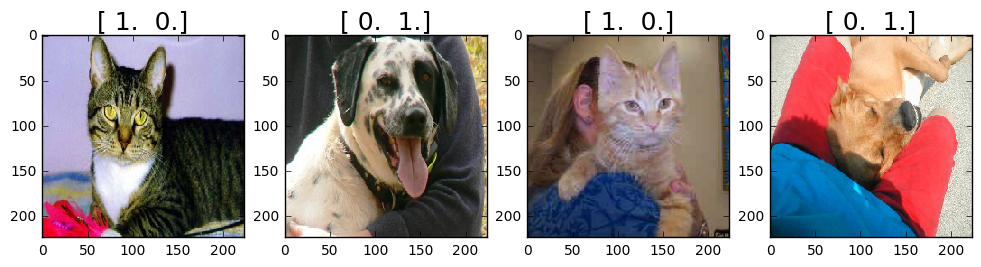

In [41]:
batches = get_batches('train', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

# This shows the 'ground truth'
plots(imgs, titles=labels)

The VGG model returns 1,000 probabilities for each image, representing the probability that the model assigns to each possible imagenet category for each image. By finding the index with the largest probability (with *np.argmax()*) we can find the predicted label.

In [42]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [43]:
pred_batch(imgs)

Shape: (4, 1000)
First 5 classes: [u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']
First 5 probabilities: [  2.4583e-07   7.5971e-07   5.2841e-07   1.5755e-07   1.6483e-08]

Predictions prob/class: 
  0.7315/tabby
  0.4508/Great_Dane
  0.3892/Egyptian_cat
  0.0909/basset
